<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/88_DOE_2_x_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño Factorial 2x3**
## ***Ejercicio 19, pág. 160 -Humberto Gutiérrez Pulido - Román de la Vara Salazar***
### **Problema de aplicación:** *Se corre un diseño factorial 3 × 2 con 10 réplicas para investigar el hinchamiento del catalizador después de la extrusión en la fabricación de botellas de polietileno de alta densidad. El catalizador se utiliza en la obtención de dicho polietileno. Los factores investigados son: molde (con dos niveles) y B: catalizador (con tres niveles). Los datos obtenidos se muestran en la siguiente tabla:*

# **1. Librerias a usar**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Ingresando los datos del problema a Python**

In [ ]:
Molde  =  [ "A1" ,  "A2" ]
Catalizador  =  [ "B1" ,  "B2",  "B3" ]
hinchamiento = [93, 92, 90, 91, 92, 91, 90, 91, 93, 90,
                92, 94, 90, 91, 90, 91, 92, 92, 92, 91,
                95, 94, 94, 94, 94, 97, 95, 96, 94, 96,
                88, 88, 87, 87, 88, 87, 87, 87, 87, 88,
                90, 88, 88, 88, 89, 90, 89, 88, 88, 89,
                91, 90, 92, 90, 97, 89, 90, 91, 91, 91]


In [ ]:
Molde = ["A1"] * 30 + ["A2"] * 30

Catalizador = (["B1"] * 10 + ["B2"] * 10 + ["B3"] * 10) * 2

In [ ]:
datos  = pd.DataFrame({    'Molde': Molde,    'Catalizador': Catalizador,    'hinchamiento': hinchamiento})

In [ ]:
datos.head()

,Molde,Catalizador,hinchamiento
0,A1,B1,93
1,A1,B1,92
2,A1,B1,90
3,A1,B1,91
4,A1,B1,92


# **3. Análisis gráficos**

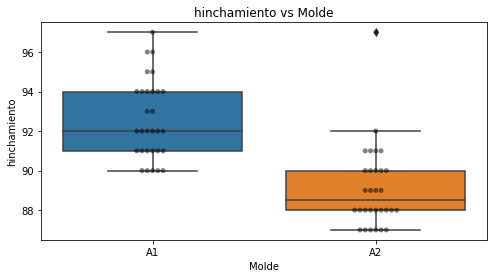

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('hinchamiento vs Molde')
sns.boxplot(x="Molde", y="hinchamiento", data=datos, ax=ax)
sns.swarmplot(x="Molde", y="hinchamiento", data=datos, color='black', alpha=0.5, ax=ax);

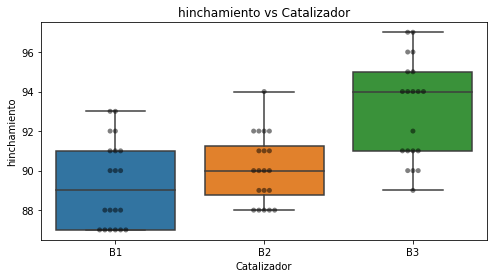

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('hinchamiento vs Catalizador')
sns.boxplot(x="Catalizador", y="hinchamiento", data=datos, ax=ax)
sns.swarmplot(x="Catalizador", y="hinchamiento", data=datos, color='black', alpha=0.5, ax=ax);

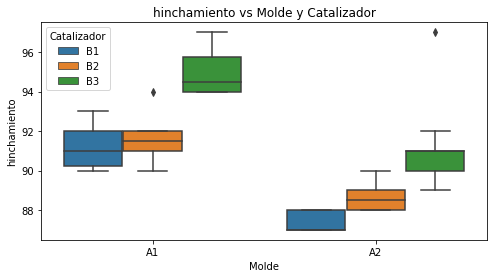

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('hinchamiento vs Molde y Catalizador')
sns.boxplot(x="Molde", y="hinchamiento", hue='Catalizador', data=datos, ax=ax);

# **4. Medidas descriptivas**

In [ ]:
print('hinchamiento media y desviación típica para Molde y Catalizador')
datos.groupby(['Molde', 'Catalizador'])['hinchamiento'].agg(['mean', 'std'])

hinchamiento media y desviación típica para Molde y Catalizador


mean       std
Molde Catalizador                
A1    B1           91.3  1.159502
      B2           91.5  1.178511
      B3           94.9  1.100505
A2    B1           87.4  0.516398
      B2           88.7  0.823273
      B3           91.2  2.201010

# **5. Gráficos de interacción**

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot

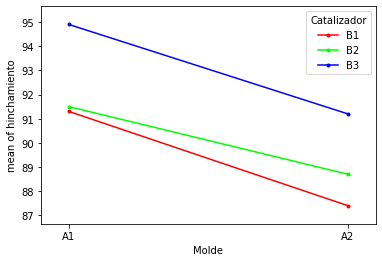

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.Molde,
    trace    = datos.Catalizador,
    response = datos.hinchamiento,
    ax       = ax,
)

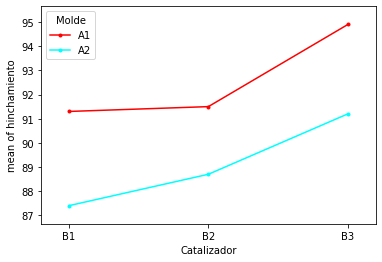

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    trace        = datos.Molde,
    x    = datos.Catalizador,
    response = datos.hinchamiento,
    ax       = ax,
)

# **6. Analisis de varianza**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model2 = ols('hinchamiento ~ Molde*Catalizador',                 # Model formula
            data = datos).fit()

anova_result = sm.stats.anova_lm(model2, typ=2)
print (anova_result)

                       sum_sq    df           F        PR(>F)
Molde              180.266667   1.0  111.123288  1.022934e-14
Catalizador        153.033333   2.0   47.167808  1.415809e-12
Molde:Catalizador    3.433333   2.0    1.058219  3.541595e-01
Residual            87.600000  54.0         NaN           NaN


# **7. Pruebas de rangos múltiples**

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
tukey = pairwise_tukeyhsd(endog=datos["hinchamiento"],     # Data
                          groups=datos["Molde"],   # Groups
                          alpha=0.05)          # Significance level

#tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=49.57,ymin=-0.5,ymax=14.5, color="red")

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A1,A2,-3.4667,0.001,-4.5269,-2.4064,True


group1,group2,meandiff,p-adj,lower,upper,reject
B1,B2,0.75,0.5254,-0.9102,2.4102,False
B1,B3,3.7,0.001,2.0398,5.3602,True
B2,B3,2.95,0.001,1.2898,4.6102,True


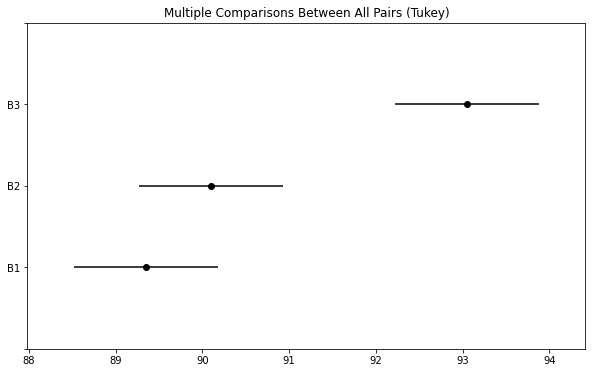

In [ ]:
tukey = pairwise_tukeyhsd(endog=datos["hinchamiento"],     # Data
                          groups=datos["Catalizador"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=14.5, color="red")

tukey.summary()